In [91]:
# Set up autoreload for testing
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
# Add the parent directory to the system path in order to get the utils directory
import sys, os
sys.path.insert(0, os.path.abspath('..'))

In [93]:
# Import the game configuration state & login secrets
import yaml
with open(r'../configs/secrets.yaml') as file:
    SECRETS = yaml.load(file, Loader=yaml.FullLoader)

with open(r'../configs/game.yaml') as file:
    GAME_CONFIG = yaml.load(file, Loader=yaml.FullLoader)

In [94]:
# Create a new Littlefield Driver
from utils.LittlefieldDriver import LittlefieldDriver
lfd = LittlefieldDriver(
    config = GAME_CONFIG,
    secrets = SECRETS
)

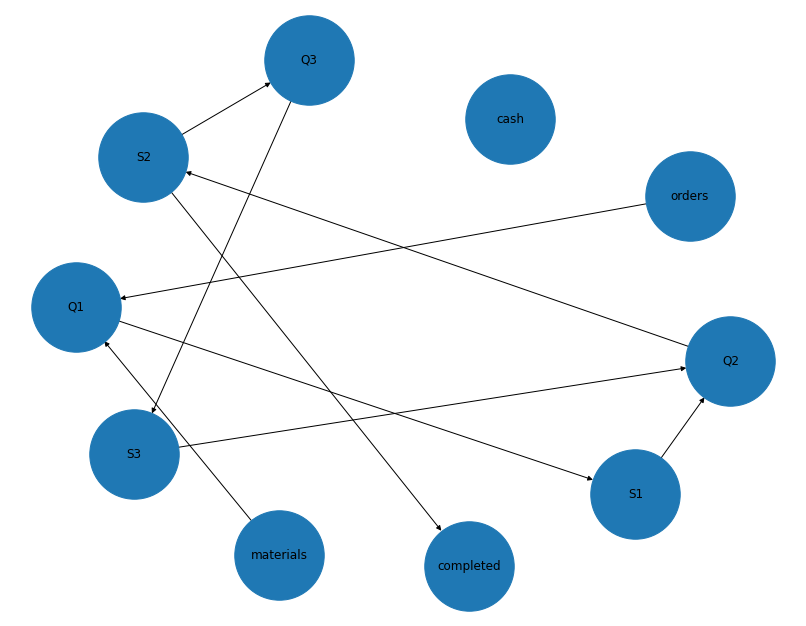

In [95]:
# Output a graph of the internal game structure to verify it isn't jacked up.
lfd.draw_graph(f"../outputs/{lfd.name}_graph.png")

In [96]:
# Fetch the historical data of each node in the game.
lfdata = lfd.data(refresh = True)
lfdata.tail()

,JOBIN,JOBREJECTS,JOBQ,ORDERS_NAME,ORDERS_MAXIMUM_WIP_LIMIT,ORDERS_NUMBER_OF_KITS_IN_1_JOB,ORDERS_LOT_SIZE,ORDERS_CURRENT_CONTRACT,ORDERS_QUOTED_LEAD_TIME,ORDERS_MAXIMUM_LEAD_TIME,...,S3Q,S3UTIL,S3_NUMBER_OF_MACHINES,S3_SCHEDULING_POLICY,S3_PURCHASE_PRICE,S3_RETIREMENT_PRICE,JOBOUT,JOBT,JOBREV,CASH
day,,,,,,,,,,,,,,,,,,,,,
46,18.0,0.0,0.0,spelkingtondotgithubdotioslashlittlefield,50.0,60.0,60.0,1.0,0.2,0.4,...,0.0,0.625,1.0,FIFO,100.0,0.0,17.0,0.074,400.0,1173.2
47,18.0,0.0,0.0,spelkingtondotgithubdotioslashlittlefield,50.0,60.0,60.0,1.0,0.2,0.4,...,0.0,0.625,1.0,FIFO,100.0,0.0,19.0,0.074,400.0,1180.8
48,18.0,0.0,0.0,spelkingtondotgithubdotioslashlittlefield,50.0,60.0,60.0,1.0,0.2,0.4,...,0.0,0.648,1.0,FIFO,100.0,0.0,18.0,0.074,400.0,1188.0
49,19.0,0.0,0.0,spelkingtondotgithubdotioslashlittlefield,50.0,60.0,60.0,1.0,0.2,0.4,...,0.0,0.654,1.0,FIFO,100.0,0.0,19.0,0.074,400.0,1195.6
50,20.0,0.0,0.0,spelkingtondotgithubdotioslashlittlefield,50.0,60.0,60.0,1.0,0.2,0.4,...,0.0,0.673,1.0,FIFO,100.0,0.0,19.0,0.074,400.0,1203.2


In [ ]:
lfdata.to_csv("../outputs/game_1_data.csv")